<a href="https://colab.research.google.com/github/sssenji/Calculator/blob/main/Churn%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача: Изучить отток клиентов для провайдера интернет услуг и телефонии.

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Общая характеристика данных


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# EDA

In [21]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

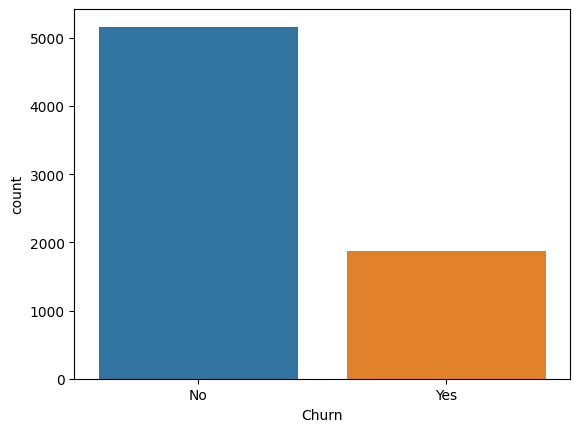

In [22]:
sns.countplot(data=df, x = 'Churn' )

<Axes: xlabel='Churn', ylabel='TotalCharges'>

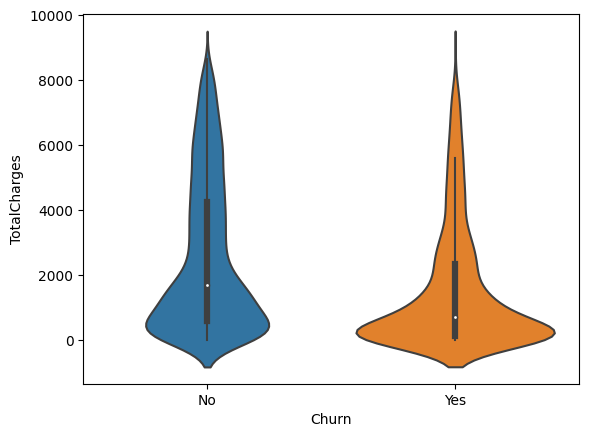

In [23]:
sns.violinplot(data=df, x = 'Churn', y = 'TotalCharges')

<Axes: xlabel='Contract', ylabel='TotalCharges'>

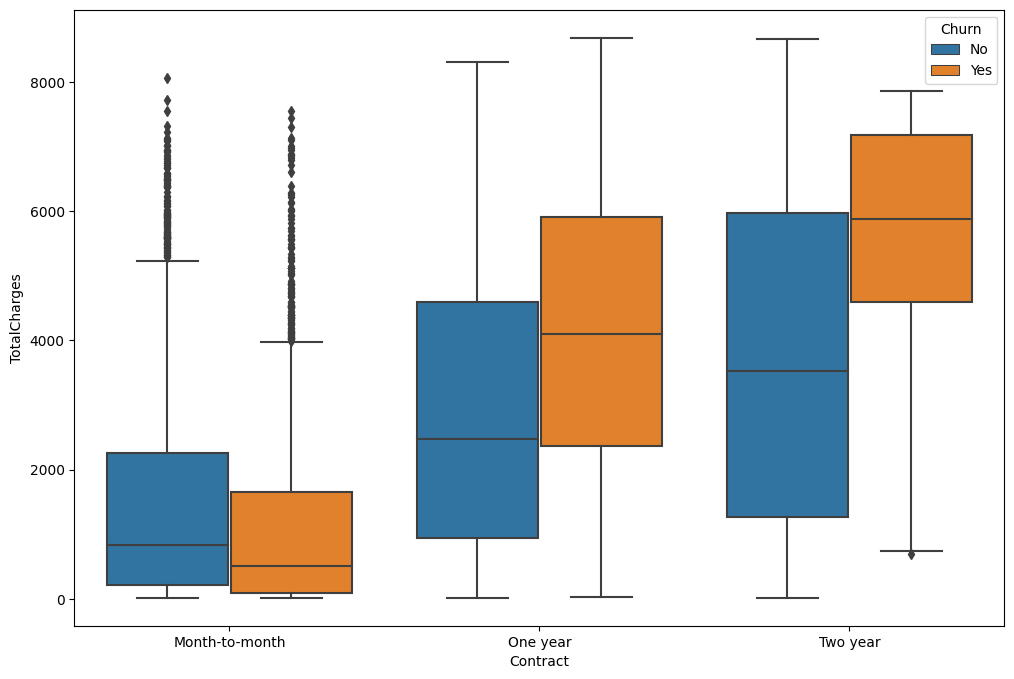

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df, x = 'Contract', y = 'TotalCharges', hue = 'Churn')

In [25]:
customerid = df.drop('customerID', axis=1)

In [27]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [28]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

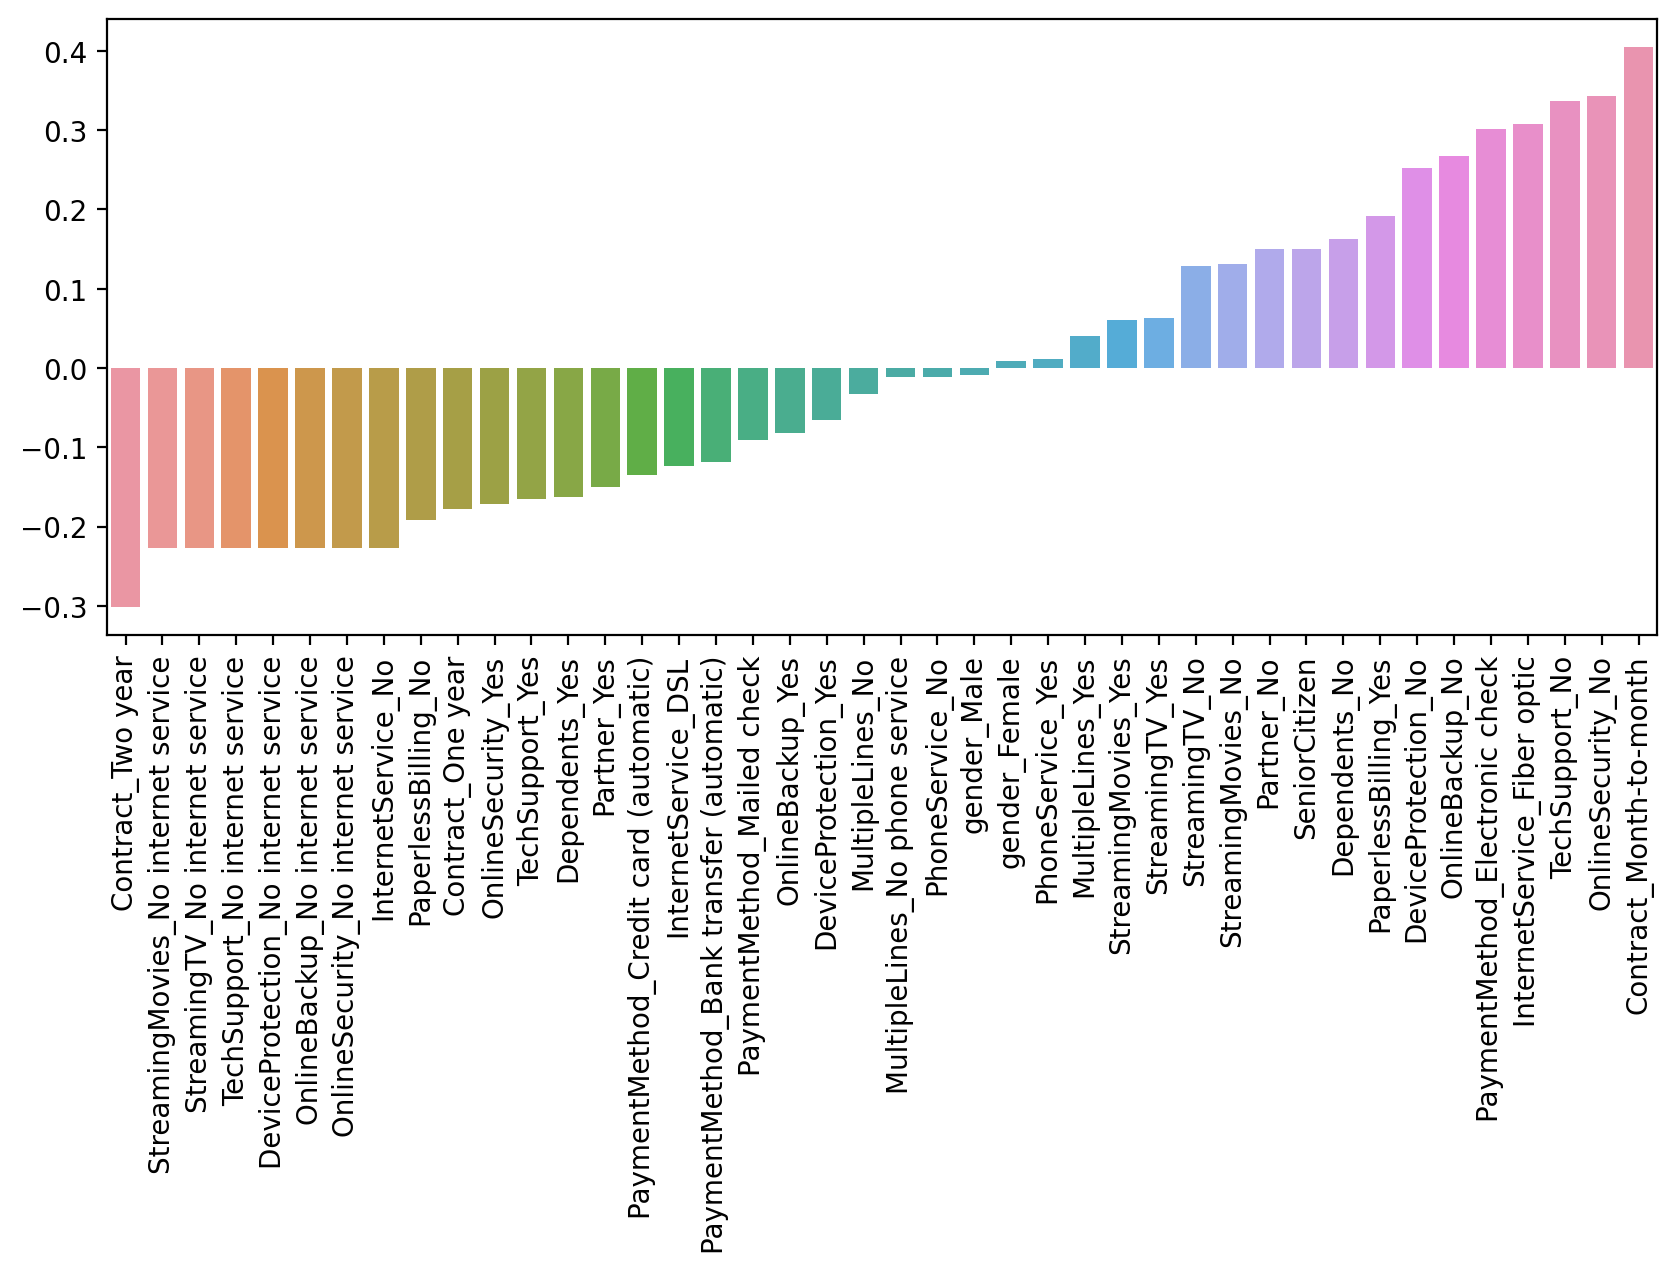

In [29]:
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(x = corr_df['Churn_Yes'].sort_values().iloc[1:-1].index, y = corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.xticks(rotation=90);

# Анализ оттока
Выполним сегментацию абонентов на основе колонки tenure, создавая "когорты" и выполняя сравнение данных между различными когортами.

In [30]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Axes: xlabel='tenure', ylabel='Count'>

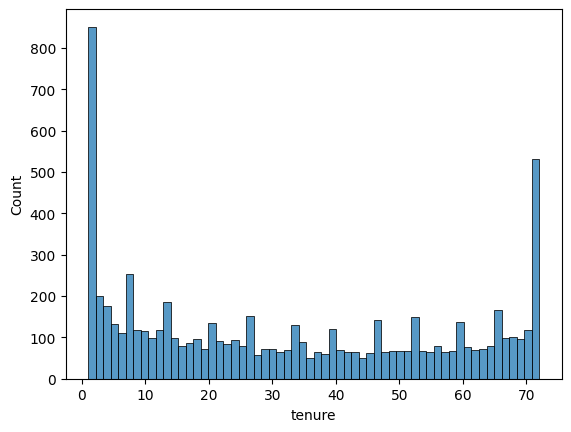

In [31]:
sns.histplot(data = df, x = 'tenure', bins=60)

<Figure size 2000x600 with 0 Axes>

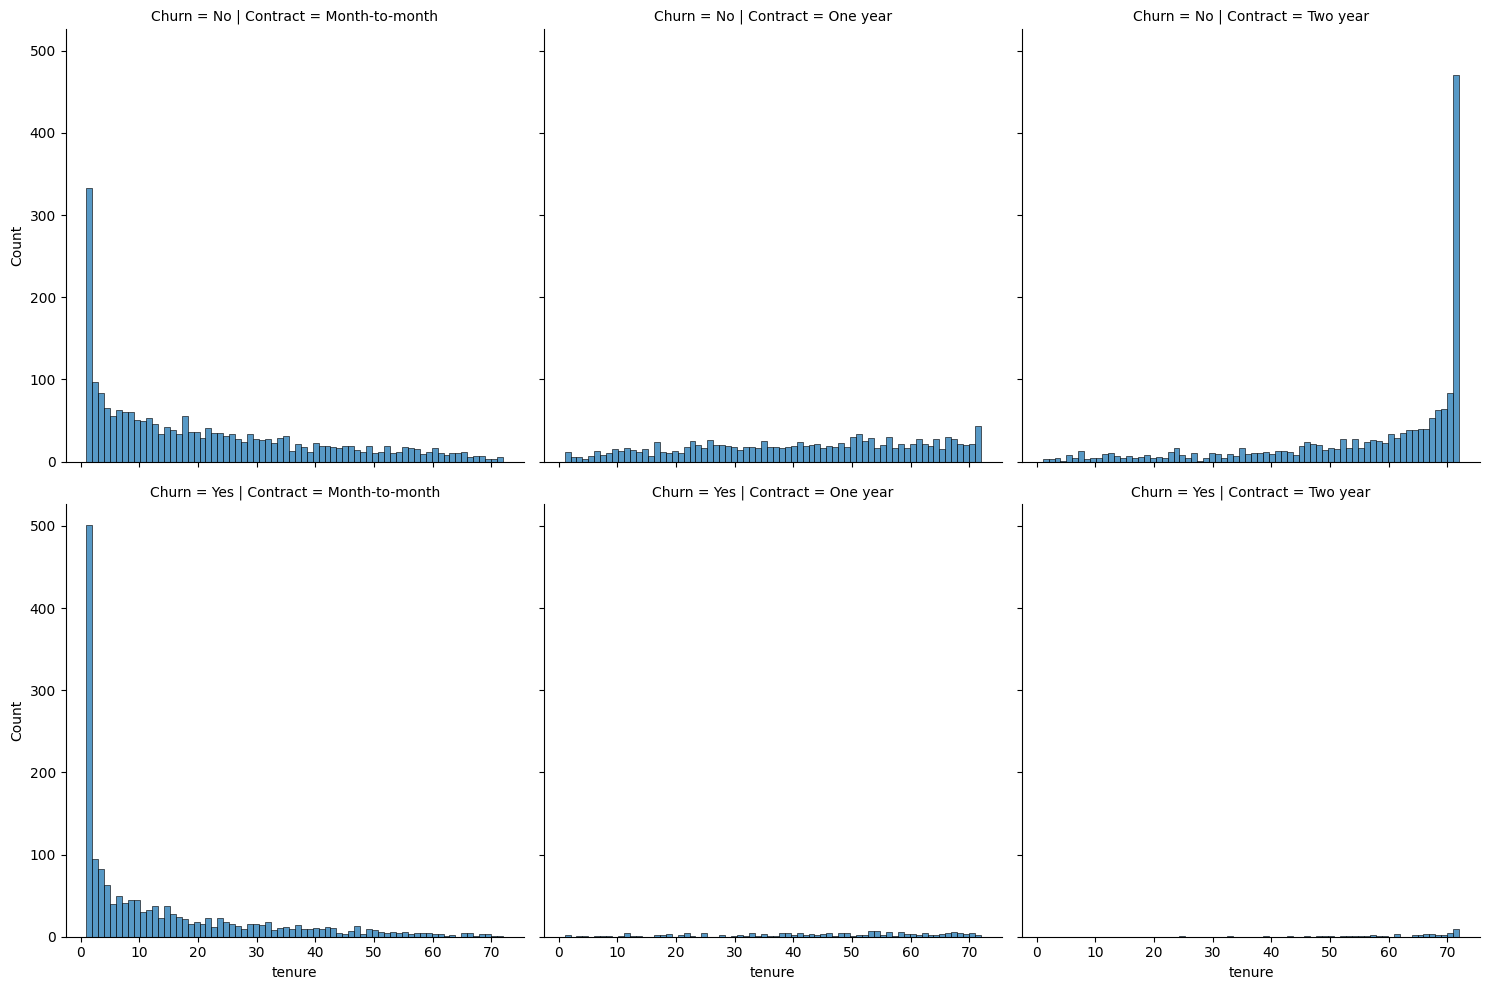

In [32]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

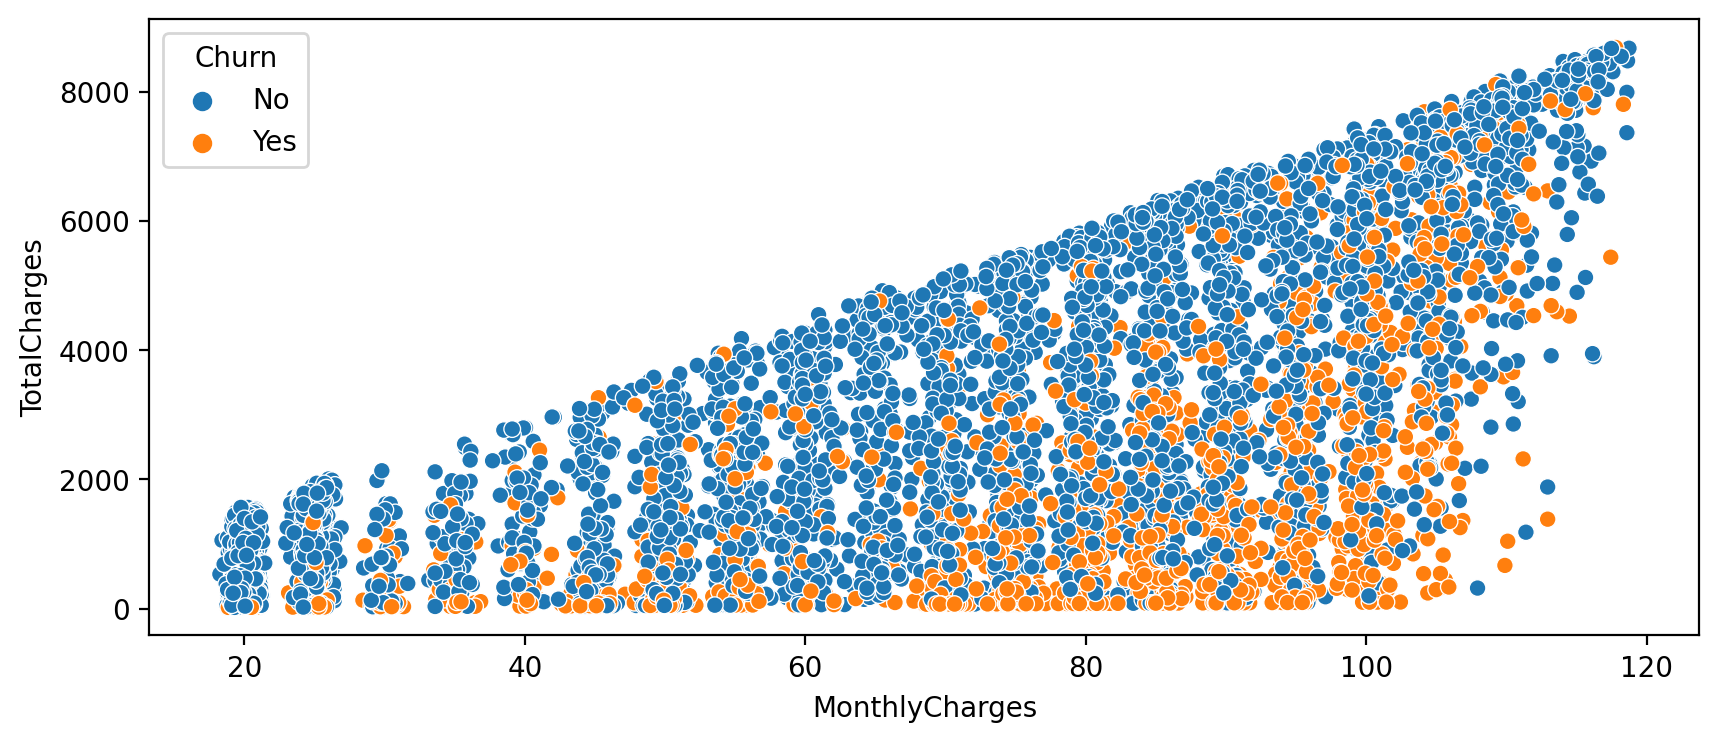

In [33]:
plt.figure(figsize=(10,4), dpi = 200)
sns.scatterplot(data=df, x= 'MonthlyCharges', y = 'TotalCharges', hue = 'Churn')

In [34]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']
churn_rate = 100 * yes_churn / (no_churn + yes_churn)

In [35]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

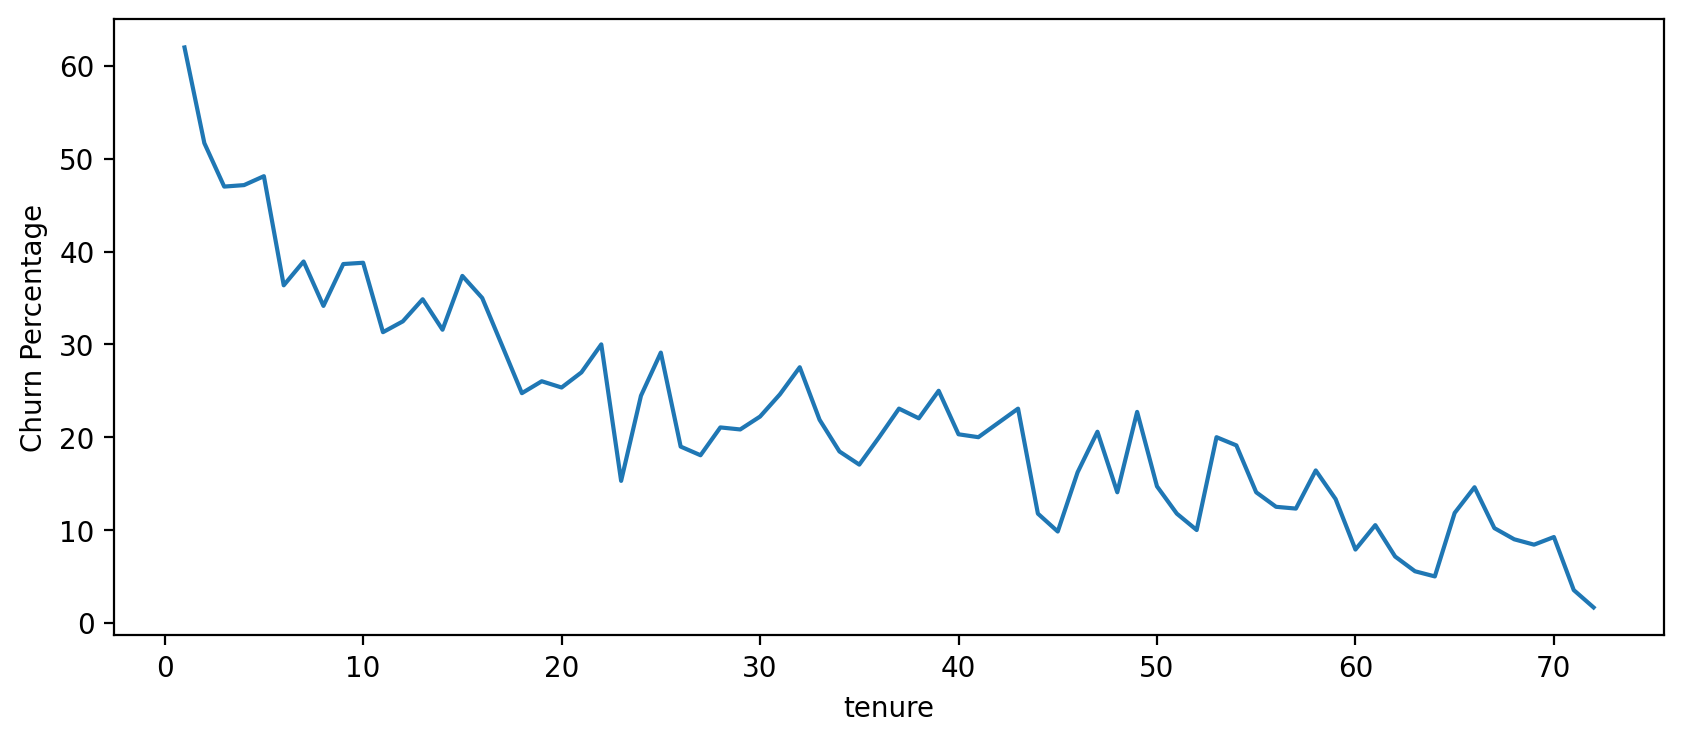

In [36]:
plt.figure(figsize = (10,4),dpi = 200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

In [37]:
def cohort (tenure):
    if tenure < 13:
        return '0-12 Months'
    if tenure < 25:
        return '12-24 Months'
    if tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'


df['TenureCohort'] = df['tenure'].apply(cohort)

In [38]:
df.head(10)[['tenure', 'TenureCohort']]

,tenure,TenureCohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

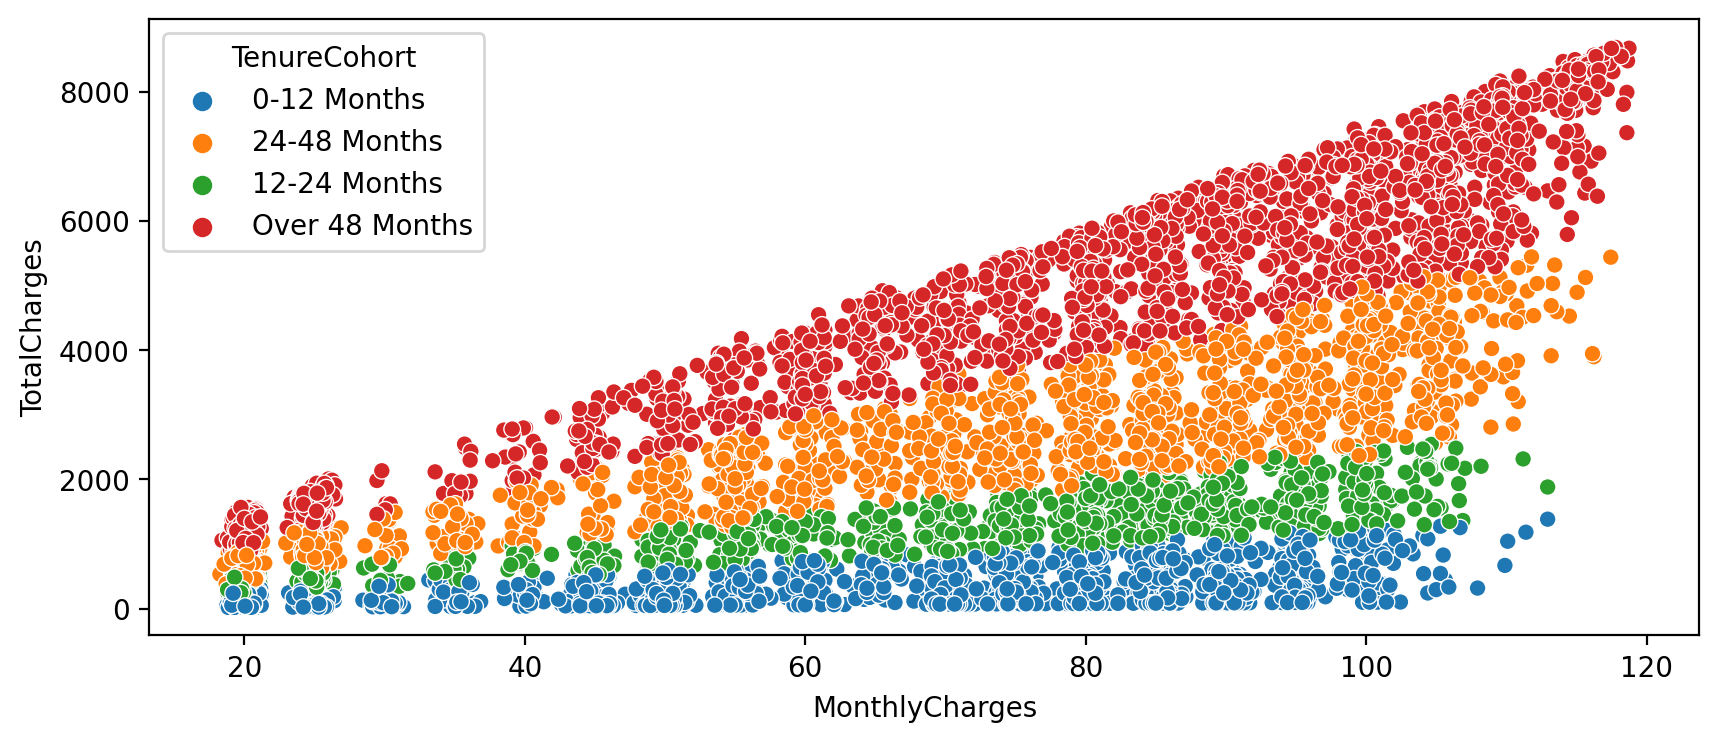

In [39]:
plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data=df, x = 'MonthlyCharges', y = 'TotalCharges', hue = 'TenureCohort')

<Axes: xlabel='TenureCohort', ylabel='count'>

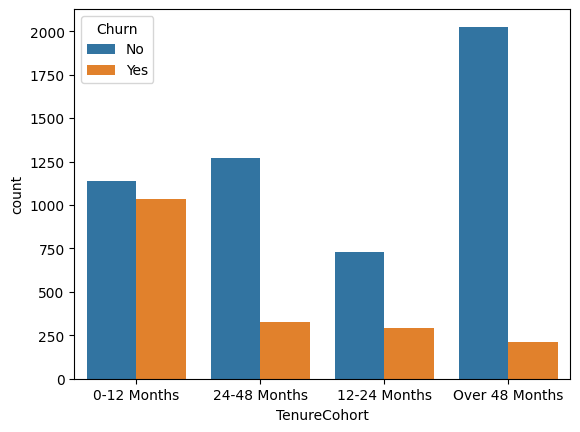

In [40]:
sns.countplot(x = 'TenureCohort', data = df, hue = 'Churn')

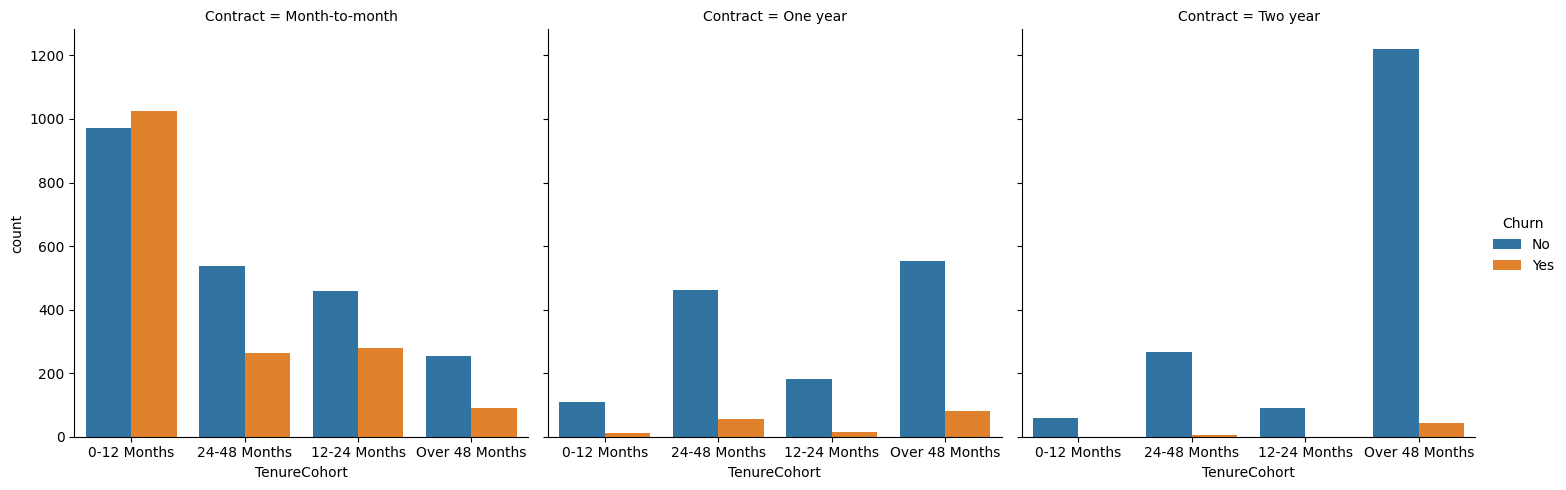

In [41]:
sns.catplot(data = df, x = 'TenureCohort', hue = 'Churn', col = 'Contract', kind = 'count')

# Моделирование
Исследуем 4 модели на основе деревьев:
Decision Tree, Random Forest, AdaBoost, GradientBoosting

In [42]:
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

In [43]:
X = pd.get_dummies(X, drop_first = True)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 6)
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)

In [46]:
print(classification_report(y_test, pred_dtc))
confusion_matrix(y_test, pred_dtc)

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



array([[498,  59],
       [ 75,  72]])

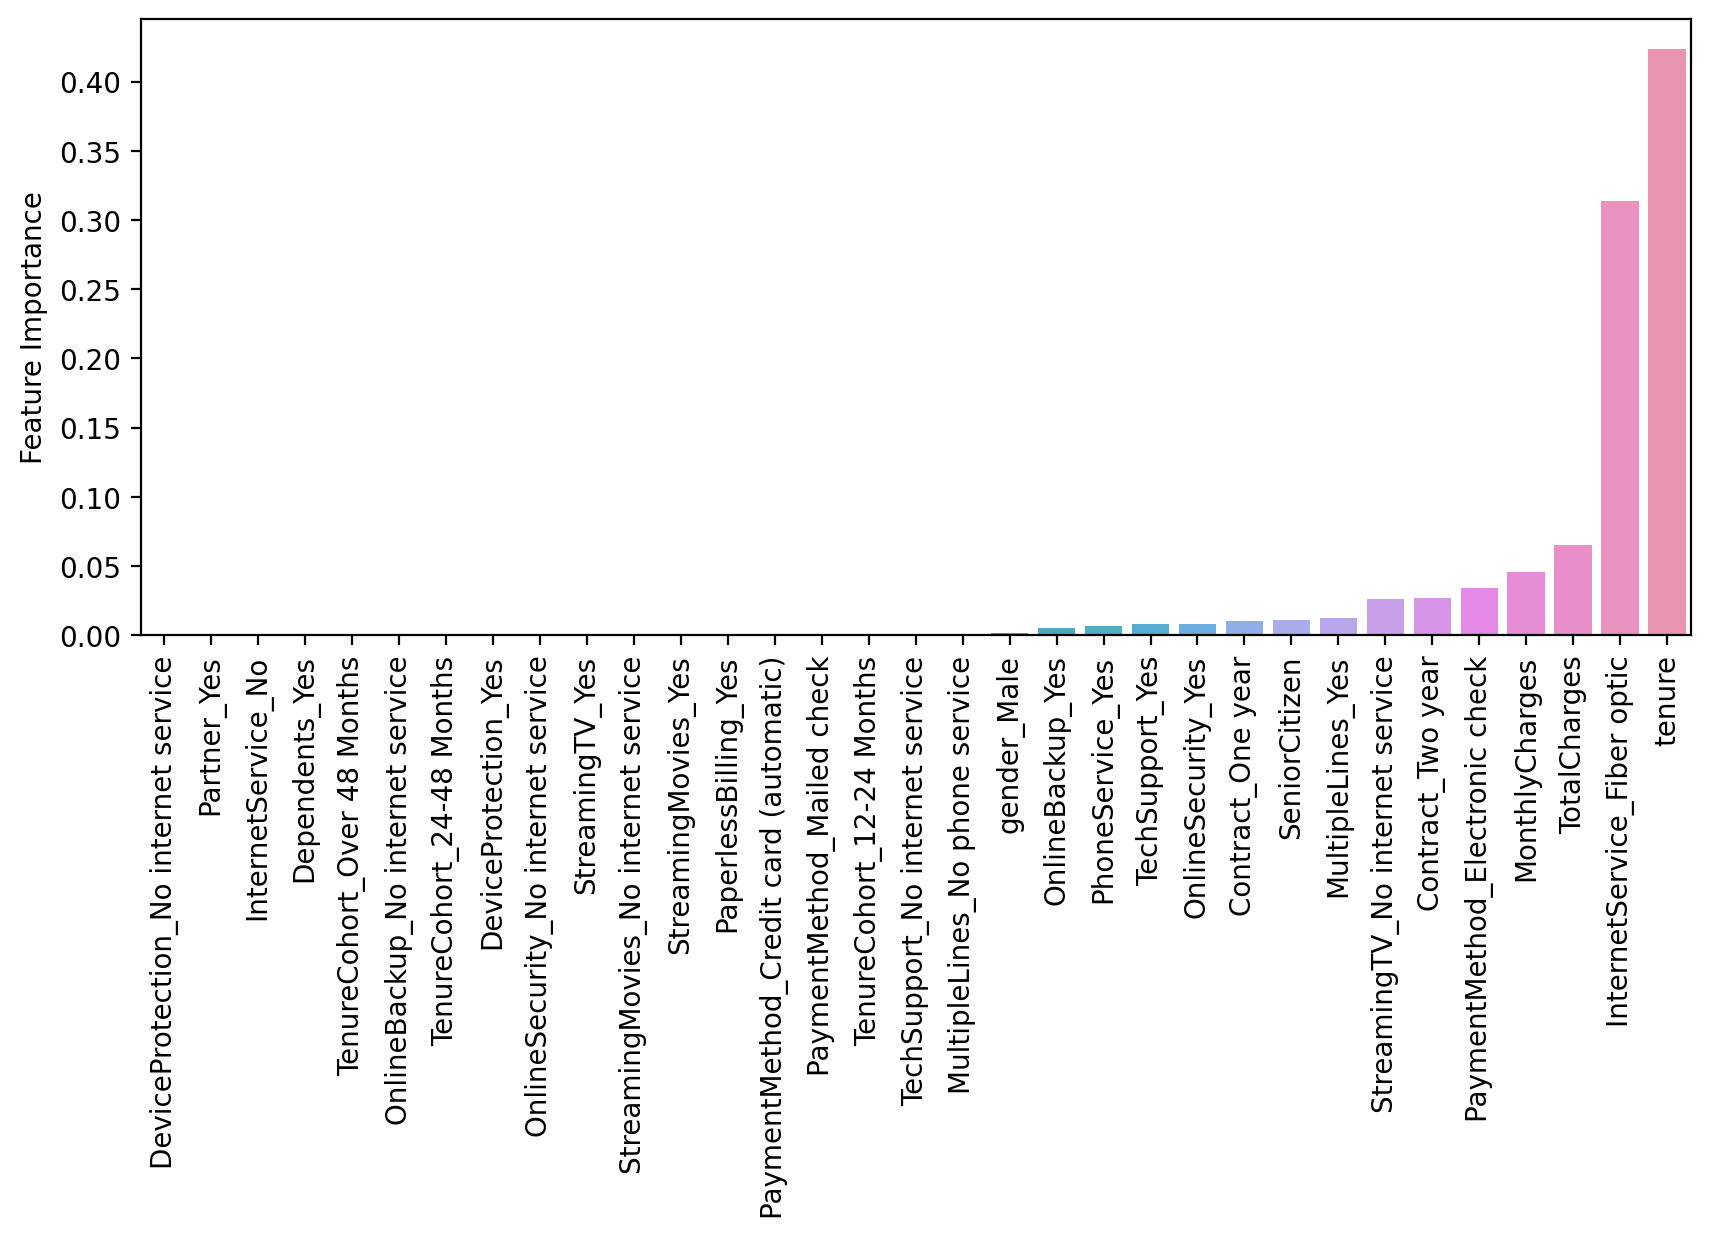

In [53]:
imp_feats = pd.DataFrame(data=dtc.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")

plt.figure(figsize = (10,4), dpi = 200)
sns.barplot(data = imp_feats.sort_values('Feature Importance'),x = imp_feats.sort_values('Feature Importance').index,y = 'Feature Importance')
plt.xticks(rotation = 90);

In [20]:
# @title Random Forest


In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 6)

rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)


print(classification_report(y_test, pred_rfc))
confusion_matrix(y_test, pred_rfc)

              precision    recall  f1-score   support

          No       0.86      0.92      0.89       557
         Yes       0.59      0.46      0.52       147

    accuracy                           0.82       704
   macro avg       0.73      0.69      0.70       704
weighted avg       0.81      0.82      0.81       704



array([[511,  46],
       [ 80,  67]])

In [ ]:
# @title Boosted Trees


In [50]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
pred_ada = ada_model.predict(X_test)
print(classification_report(y_test, pred_ada))
confusion_matrix(y_test, pred_ada)

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



array([[504,  53],
       [ 67,  80]])

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
grad_model = GradientBoostingClassifier()
grad_model.fit(X_train, y_train)
pred_grad = grad_model.predict(X_test)
print(classification_report(y_test, pred_grad))
confusion_matrix(y_test, pred_grad)

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



array([[503,  54],
       [ 74,  73]])

# Вывод:
1. Так как классы Yes Churn и No Churn изначально являлись не сбалансированными, логично ожидать, что модели будут лучше справляться с классом No Churn.
2. Лучше всего с предсказанием справилась модель AdaBoost. Она ошиблась на 67 человек которые не уйдут в отток.
Предсказания других моделей этого же числа:
GradientBoosting: 74
DecisionTree:  75
RandomForest: 80
3. Однако, метрки всё-равно выглядят не очень. Чтобы это исправить, на мой взгляд, можно пойти двумя путями:
- Сделать GridSearch для всех моделей для поиска наилучших гиперпараметров.
- Попробовать другие модели.
